In [1]:
# Importing the modules for collecting and building the dataset
import time
import os
import re

# Web-scraping...
from urllib.request import Request, urlopen
from urllib.request import URLError, HTTPError

# Image processing...
from PIL import Image

In [2]:
# Scraping the Google image resources - unquote this part of code if you want to go through hand-picking hell yourself


cars = ['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Citroen', 'Dacia', 'Daewoo', 'Dodge',
        'Ferrari', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Lada',
        'Lancia', 'Land Rover', 'Lexus', 'Maserati', 'Mazda', 'Mercedes', 'Mitsubishi',
        'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault', 'Rover', 'Saab', 'Seat',
        'Skoda', 'Subaru', 'Suzuki', 'Tata', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo']

kwrds = ['logo', 'logotype', 'logo png', 'logo gif', 'logo jpg', 'logo front',
         'logo rear', 'badge', 'logo white', 'logo black', 'logo transparent']
"""
def scrape(link):
    try:
        headers = {}
        headers['User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"
        return str(urlopen(Request(link, headers = headers)).read())
    except Exception as e:
        print(str(e))

# function that will get the url of the image to download
def get_logo(l):
    line = l.find('"class="rg_meta"')
    start = l.find('"ou"', line + 1)
    end = l.find(',"ow"', start + 1)
    raw = str(l[start + 6:end - 1])
    return raw, end

def get_all_logos(page):
    items = []
    while True:
        item, p = get_logo(page)
        if item == "no_links":
            break
        else:
            items.append(item)
            time.sleep(0.1)
            page = page[p:]
    return items

# Beginning the download
i = 0
while i < len(cars):
    
    items = []
    car = cars[i].replace(' ', '%20')
    os.makedirs(cars[i])
    
    j = 0
    while j < len(kwrds):
        search_term = kwrds[j].replace(' ','%20')
        url = 'https://www.google.com/search?q=' + car + search_term + '&espv=2&biw=1366&bih=667&site=webhp&source=lnms&tbm=isch&sa=X&ei=XosDVaCXD8TasATItgE&ved=0CAcQ_AUoAg'
        raw =  scrape(url)
        time.sleep(0.1)
        items = items + (get_all_logos(raw))
        j+=1

    k = 0
    while k < len(items):
        try:
            req = Request(items[k], headers={"User-Agent": "Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"})
            response = urlopen(req,None,15) # specyfing the timeout (Google often has problems with images)
            output_file = open(cars[i] + "/" + str(k+1) + '.jpg','wb')
            output_file.write(response.read())
            response.close();
            k+=1
        except:
            print("Error!")
            k+=1
    i+=1

print("Done. Files downloaded. Happy handpicking!")
"""

'\ndef scrape(link):\n    try:\n        headers = {}\n        headers[\'User-Agent\'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"\n        return str(urlopen(Request(link, headers = headers)).read())\n    except Exception as e:\n        print(str(e))\n\n# function that will get the url of the image to download\ndef get_logo(l):\n    line = l.find(\'"class="rg_meta"\')\n    start = l.find(\'"ou"\', line + 1)\n    end = l.find(\',"ow"\', start + 1)\n    raw = str(l[start + 6:end - 1])\n    return raw, end\n\ndef get_all_logos(page):\n    items = []\n    while True:\n        item, p = get_logo(page)\n        if item == "no_links":\n            break\n        else:\n            items.append(item)\n            time.sleep(0.1)\n            page = page[p:]\n    return items\n\n# Beginning the download\ni = 0\nwhile i < len(cars):\n    \n    items = []\n    car = cars[i].replace(\' \', \'%20\')\n    os.makedirs(cars[i])\n    \n    j 

In [3]:
# Importing standard ML set - numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Importing keras and its deep learning tools - neural network model, layers, contraints, optimizers, callbacks and utilities
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import adam, RMSprop, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling

# Importing scikit-learn tools
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

C:\Users\Harsh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Setting up the image pool
image_path = 'images/'
imgs = os.listdir(image_path)
img_x = img_y = 50 # image size is constant
n_samples = np.size(imgs)
n_samples 

20778

In [5]:
# Loading all images...
images = np.array([np.array(Image.open(image_path + img).convert("RGB")).flatten() for img in os.listdir(image_path)], order='F', dtype='uint8')
np.shape(images)

(20778, 7500)

In [6]:
# an example image
images[1][1:]

array([255, 255, 249, ..., 255, 255, 255], dtype=uint8)

In [7]:
# Producing labels and assigning them accordingly
labels = np.array([cars.index(re.match(r"(^\D+)", imgs[i])[0]) for i in range(n_samples)])
labels.shape

(20778,)

In [8]:
# Some additional data preparation needs to be done before blasting the images into the neural net
dataset, labelset = shuffle(images, labels, random_state=42) # 42, what else? ;)
train_data = [dataset, labelset]

(20778, 7500) (20778,)


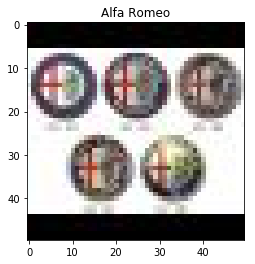

In [9]:
# Testing if the images loaded up okay - 500 should show Alfa Romeo label and a five-logo image
r = 500
print(train_data[0].shape, train_data[1].shape)
plt.imshow(images[r].reshape(img_x, img_y, 3))
plt.title(cars[labels[r]])
plt.show()

In [10]:
# We have to prepare the dataset to fit into the CNN
X_train, X_test, y_train, y_test = train_test_split(train_data[0], train_data[1], test_size=0.2)

# we will maintain a copy of the test set, as we will do a couple of transformation to it
X_test_img = X_test.copy()

# let's bring back the images, like above
X_train = X_train.reshape(X_train.shape[0], img_x, img_y, 3)
X_test = X_test.reshape(X_test.shape[0], img_x, img_y, 3)

# Now for some convergence-friendly procedure (is supposed to converge a lot faster when brought to 0-1 float)...
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# ...and some additional pre-processing, to zero-center the data...
X_train = np.subtract(X_train, 0.5)
X_test = np.subtract(X_test, 0.5)

# ...and to scale it to (-1, 1)
X_train = np.multiply(X_train, 2.0)
X_test = np.multiply(X_test, 2.0)

# Labels have to be transformed to categorical
Y_train = np_utils.to_categorical(y_train, num_classes=len(cars))
Y_test = np_utils.to_categorical(y_test, num_classes=len(cars))

In [11]:
# All should be okay, but we still need some heavy data augmentation, as 20k samples with 40 labels is a bit too few...
X_train.shape, X_test.shape


((16622, 50, 50, 3), (4156, 50, 50, 3))

In [12]:
# In order to process data augmentation, keras' ImageDataGenerator can apply some transformations to images on random
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # featurewise_center=False,
    # samplewise_center=False,
    # featurewise_std_normalization=True,
    # samplewise_std_normalization=True,
    # zca_whitening=True,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

In [13]:
# It has to be 'fit' into the training set, which will take a while...
datagen.fit(X_train)

In [14]:
# Finally for some CNN construction!

# setting up batch size
batch = 128

# there are 40 brands altogether, so far, but let's make it official
n_classes = len(cars)

# setting up the number of epochs to be trained
n_epochs = 200

# images are RGB, so they use up 3 channels for Red, Green and Blue, respectively
n_channels = 3

In [15]:
# Convolutional Neural Network will be composed of four Conv/MaxPool blocks, a flattening layer and two dense layers at the end
# (before the final classification layer, that is)

# The model will have a sequential architecture
# NOTE: kernel and bias had to be fine-tuned in order to increase the chance of converging

model = Sequential()
model.add(Conv2D(32, (3,3),
                 input_shape=(img_x,img_y,n_channels),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3),
                 padding='valid',
                 bias_initializer='glorot_uniform',
                 kernel_regularizer=l2(0.00004),
                 kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
model.add(Dropout(0.5))

# final activation is softmax, tuned to the number of classes/labels possible
model.add(Dense(len(cars), activation='softmax'))

# Some callbacks have to be provided to choose the best trained model
# patience set at 4 as 3 was too greedy - I observed better results after the third-worse epoch
early_stopping = EarlyStopping(patience=4, monitor='val_loss')
CNN_file = 'car_CNN_13AUGM_CMCMCMCMF.h5py' # the 13th try, with augmented data
take_best_model = ModelCheckpoint(CNN_file, save_best_only=True)

# optimizer will be a stochastic gradient descent, learning rate set at 0.005
sgd = SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

# Let's look at the summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)         295168    
__________

In [16]:
# Training time was around 4 minutes per epoch, restarting a few times - over 16 hours overall
"""model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch, shuffle=True, seed=42),\
                    steps_per_epoch=X_train.shape[0]//batch, epochs=n_epochs,\
                    validation_data=(X_test, Y_test), workers=4)"""

'model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch, shuffle=True, seed=42),                    steps_per_epoch=X_train.shape[0]//batch, epochs=n_epochs,                    validation_data=(X_test, Y_test), workers=4)'

In [17]:
# that 'little' file (~145MB) just cost me 16 hours to produce, so it's better to load it now
model.load_weights('car_CNN_13AUGM_CMCMCMCMF.h5py')

In [18]:
X_train.shape

(16622, 50, 50, 3)

In [19]:
# I will need that later to re-convert my flattened images to their previous state
def ImageConvert(n, i):
    im_ex = i.reshape(n, img_x, img_y, 3)
    im_ex = im_ex.astype('float32') / 255
    im_ex = np.subtract(im_ex, 0.5)
    im_ex = np.multiply(im_ex, 2.0)
    return im_ex

In [20]:
scores = model.evaluate(X_test, Y_test) # let's look at the accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))

4156/4156 [==============================] - 24s 6ms/step
Accuracy test: 94.18%


In [21]:
from sklearn.metrics import precision_recall_fscore_support as prfs

# Preparing for metrics check-up on the test set, may take a while...
Y_pred = model.predict_classes(X_test)

In [22]:
precision, recall, f1, support = prfs(y_test, Y_pred, average='weighted')
print("Precision: {:.2%}\nRecall: {:.2%}\nF1 score: {:.2%}\nAccuracy: {:.2%}".format(precision, recall, f1, scores[1]))

Precision: 94.32%
Recall: 94.18%
F1 score: 94.18%
Accuracy: 94.18%


In [23]:
# But let's check per class, too - assuming that larger datasets will be having higher metrics
precision_, recall_, f1_, support_ = prfs(y_test, Y_pred, average=None)

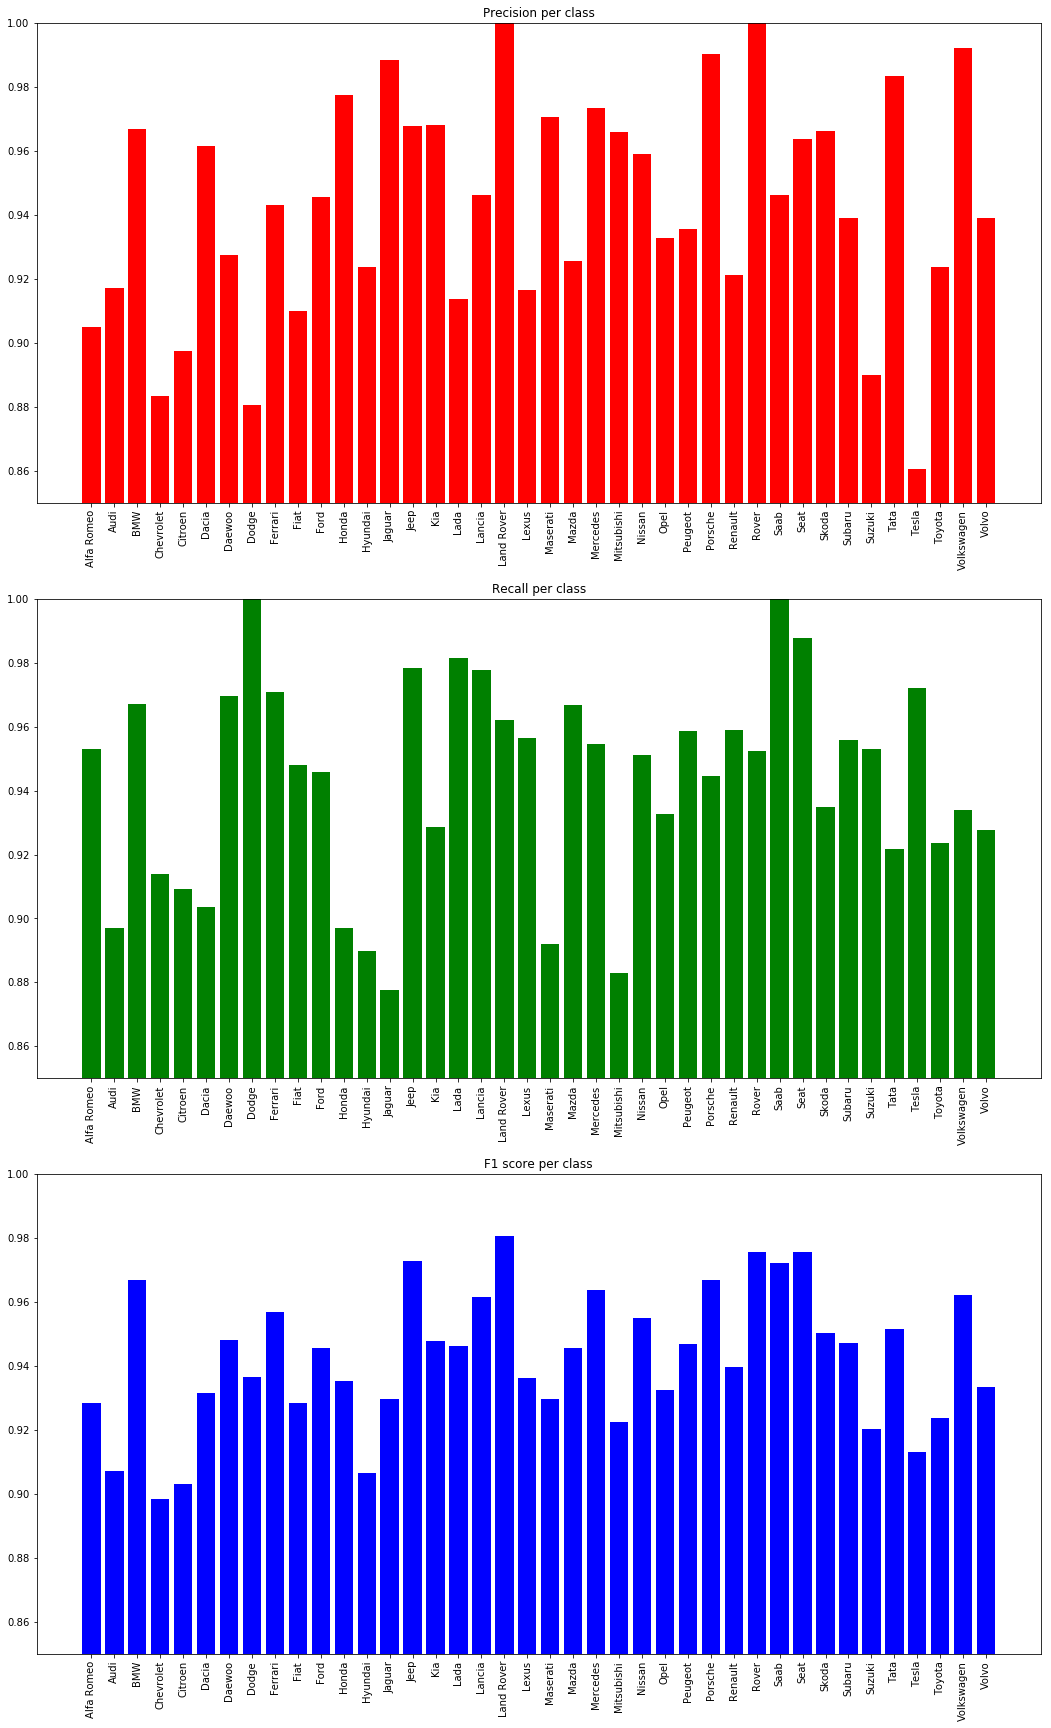

In [24]:
# We see that smaller sets (Lexus, Jaguar, Hyundai) have generally worse precision and recall
plt.subplots(figsize=(18,30))
x = range(len(cars))
plt.subplot(311)
plt.title('Precision per class')
plt.ylim(0.85, 1.00)
plt.bar(x, precision_, color='Red')
plt.xticks(x, cars, rotation = 90)
plt.subplot(312)
plt.title('Recall per class')
plt.ylim(0.85, 1.00)
plt.bar(x, recall_, color='Green')
plt.xticks(x, cars, rotation = 90)
plt.subplot(313)
plt.title('F1 score per class')
plt.ylim(0.85, 1.00)
plt.bar(x, f1_, color='Blue')
plt.xticks(x, cars, rotation = 90)
plt.show()

In [25]:
# OK, let's try the CNN in action - first defining the ShowCase() method to show everything nicely

def ShowCase(cols, rows):
    fdict = {'fontsize': 24,
            'fontweight' : 'normal',
            'verticalalignment': 'baseline'}
    plt.figure(figsize=(cols * 5, rows * 4))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    c = 0
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        
        # r - randomly picked from the whole dataset
        r = np.random.randint(np.shape(images)[0])
        
        # j - predicted class for the image of index r (weird syntax, but works :)
        j = int(model.predict_classes(ImageConvert(1, images[r:r+1]), verbose=0))
        
        # increase success if predicted well
        if labels[r] == j:
            c += 1
        
        # image needs reshaping back to a 50px*50px*RGB
        plt.imshow(images[r].reshape(img_x, img_y, 3))
        
        # plt.title will show the true brand and the predicted brand
        plt.title('True brand: '+cars[labels[r]]+'\nPredicted: '+cars[j],
                  color= 'Green' if cars[labels[r]] == cars[j] else 'Red', fontdict=fdict) # Green for right, Red for wrong
        
        # no ticks
        plt.xticks(())
        plt.yticks(())
        
    # print out the success rate
    print('Success rate: {}/{} ({:.2%})'.format(c, rows*cols, c/(rows*cols)))
    
    plt.show()

Success rate: 48/50 (96.00%)


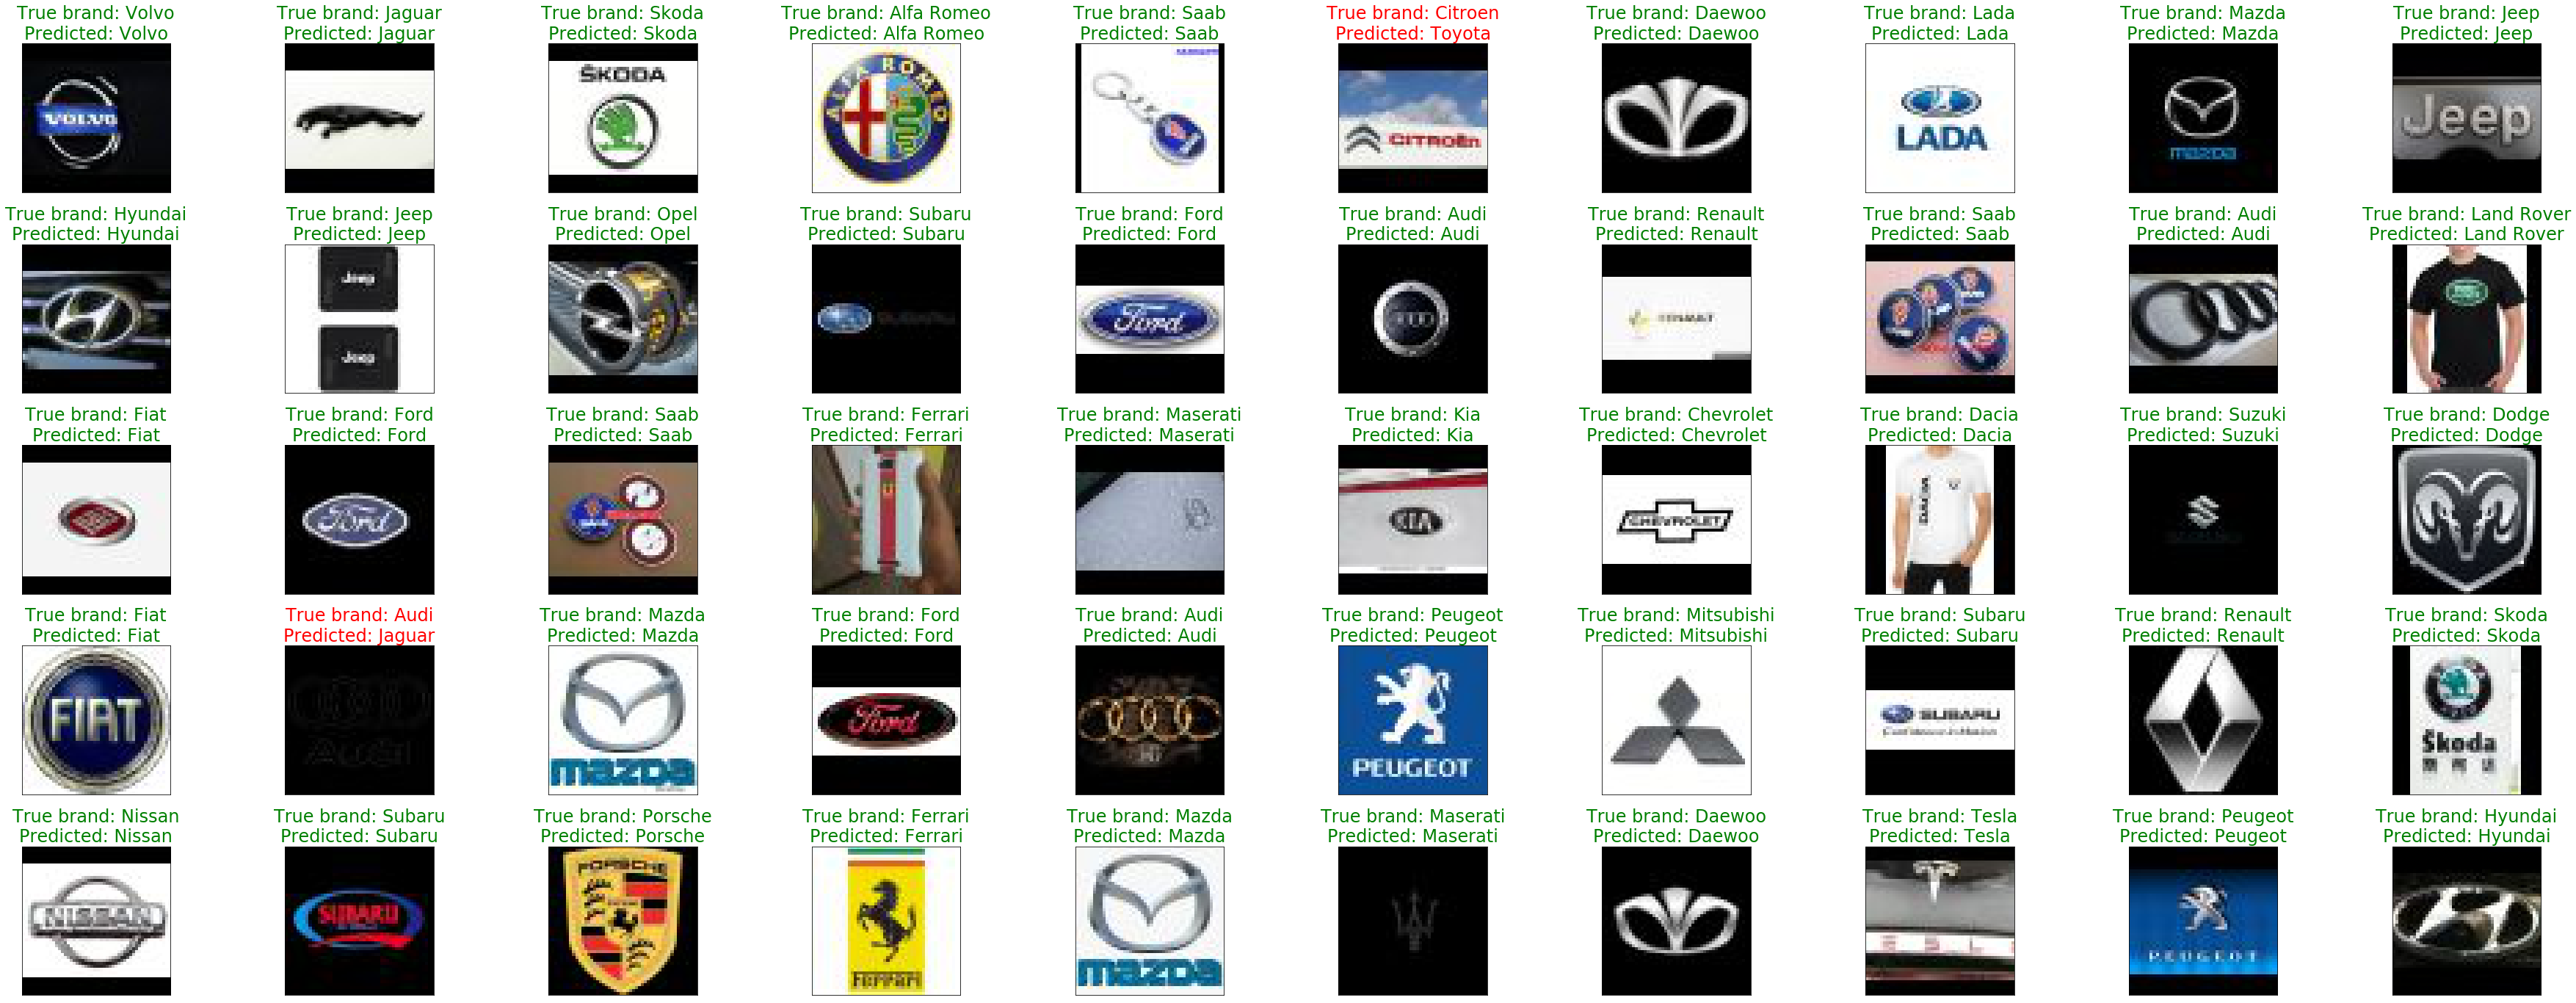

In [26]:
# That is strictly for the showcasing, how the CNN works - ain't that bad, after all :)
ShowCase(10, 5)


## New input - testing beyond the test set
Let's try to Test This Model - I went down to the road and took a picture of some car there. I tried to acquire pictures from different angles and with different lighting. I put it into the new_images folder.


In [27]:
# Setting up the image pool
new_image_path = 'new_images/'
new_imgs = os.listdir(new_image_path)
new_n_samples = np.size(new_imgs)
new_n_samples # 8

8

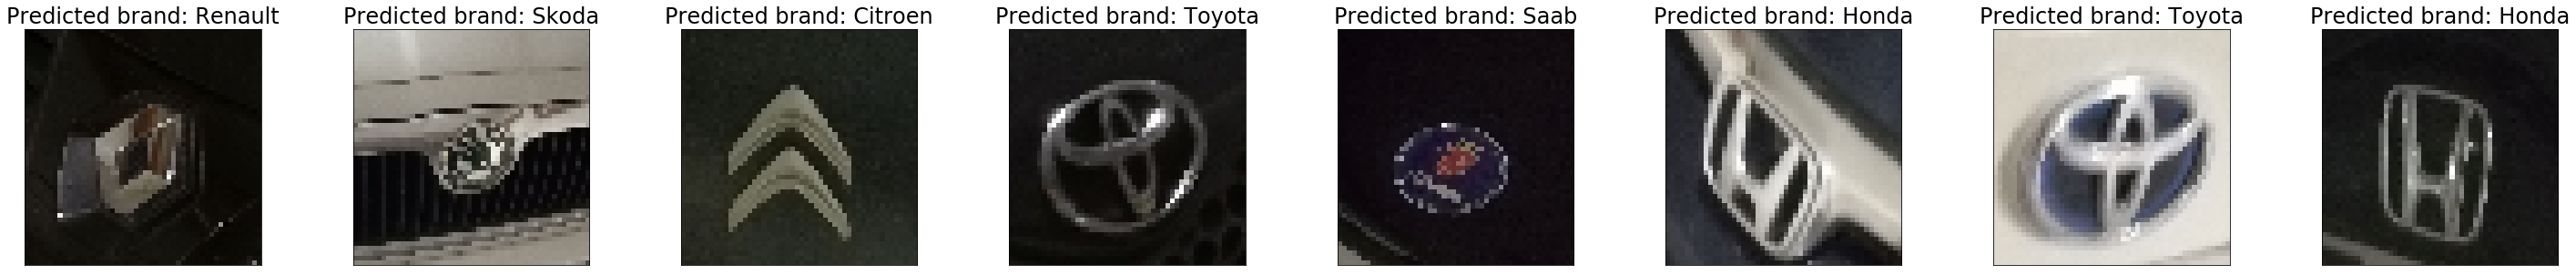

In [28]:
# Let's do some showcasing on-the-fly....
cols = 8
rows = 1
plt.figure(figsize=(cols * 5, rows * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(new_n_samples):
    plt.subplot(rows, cols, i + 1)
    im = Image.open(new_image_path+new_imgs[i]).convert("RGB")
    new_im = np.array(im.resize((50,50))).flatten()
    m = int(model.predict_classes(ImageConvert(1, new_im), verbose=0))
    plt.imshow(new_im.reshape(img_x, img_y, 3))
    plt.title('Predicted brand: '+cars[m], size=24)
    plt.xticks(())
    plt.yticks(())
plt.show()


### This Model Predicts all logos Correct.

In [29]:
import pickle


In [34]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [30]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'filename.pkl') 
  
# Load the model from the file 
knn_from_joblib = joblib.load('filename.pkl')

In [31]:
import numpy as np
from sklearn.externals import joblib
from PIL import Image
from flask import Flask, jsonify, request
 
# Create flask app
app = Flask(__name__)
 
# Load the previously trained model from the file
model = joblib.load("filename.pkl")
 
# /predict is the end point
@app.route('/predict', methods=["POST"])
def predict_image():
    # Read the image uploaded by the curl command
    requested_img = request.files['file']
 
    '''
    Convert the uploaded image to grayscale.
    Since in MNIST the training images are grayscaled hence we will have to convert the uploaded image to grayscale
    '''
    grayscale_img = Image.open(requested_img).convert('L')
 
    '''
    Resize the uploaded image to 28x28 pixels.
    Since in MNIST the training images are of 28x28 pixels hence we will have to resize the uploaded image to 28x28 pixels.
    '''
    resized_image = grayscale_img.resize((28,28))
    
    # Convert the image to an array
    img = np.asarray(resized_image)
 
    # Reshape the image to (784, 1)
    img = img.reshape(784,)
 
    # Predict the digit using the trained model
    pred = model.predict(img.reshape(1, -1))
 
    # Get the digit
    result = int(pred.tolist()[0])
 
    # Return the JSON response
    return jsonify({"digit": result})

ModuleNotFoundError: No module named 'werkzeug.wrappers.json'; 'werkzeug.wrappers' is not a package

In [32]:
# Load the previously trained model from the file
model = joblib.load("filename.pkl")

In [33]:
from flask import Flask, request, redirect, url_for, flash, jsonify
import numpy as np
import pickle as p
import json


app = Flask(__name__)


@app.route('/api/', methods=['POST'])
def makecalc():
    data = request.get_json()
    prediction = np.array2string(model.predict(data))

    return jsonify(prediction)

if __name__ == '__main__':
    modelfile = 'filename.pkl'
    model = p.load(open(modelfile, 'rb'))
    app.run(debug=True, host='0.0.0.0')


ModuleNotFoundError: No module named 'werkzeug.wrappers.json'; 'werkzeug.wrappers' is not a package